In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing  
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df=pd.read_csv('cotton_plant_dataset.csv')


In [3]:
df.shape

(5000, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location/Field     5000 non-null   object 
 1   Leaf_Color         5000 non-null   object 
 2   Symptoms           5000 non-null   object 
 3   Whitefly_Presence  5000 non-null   object 
 4   Temperature        5000 non-null   float64
 5   Humidity           5000 non-null   object 
 6   Soil_Moisture      5000 non-null   object 
 7   Previous_Crop      5000 non-null   object 
 8   Cotton_Variety     5000 non-null   object 
 9   Disease_Type       5000 non-null   object 
dtypes: float64(1), object(9)
memory usage: 390.8+ KB


In [5]:
df.columns

Index(['Location/Field', 'Leaf_Color', 'Symptoms', 'Whitefly_Presence',
       'Temperature', 'Humidity', 'Soil_Moisture', 'Previous_Crop',
       'Cotton_Variety', 'Disease_Type'],
      dtype='object')

In [6]:
df.describe()

,Temperature
count,5000.000000
mean,24.877171
std,5.751866
min,15.000233
25%,19.902915
50%,24.753022
75%,29.831628
max,34.991154


In [7]:
df.head()

,Location/Field,Leaf_Color,Symptoms,Whitefly_Presence,Temperature,Humidity,Soil_Moisture,Previous_Crop,Cotton_Variety,Disease_Type
0,Rajasthan,Yellow,Wilting,No,24.153992,Mid,Moist,Oilseeds,Hybrid,Fusarium Wilt
1,Telangana,Green,Twist or Curl upwards,Yes,19.177654,Mid,Warm,Legumes,Region-Specific,Cotton Leaf Curl Disease
2,West Bengal,Green,Absent,No,22.374143,Low,Warm,Grains,Hybrid,Normal
3,Jharkhand,Green,Twist or Curl upwards,Yes,22.396265,High,Warm,Grains,Hybrid,Cotton Leaf Curl Disease
4,Uttar Pradesh,Yellow,Wilting,No,16.047100,Mid,Moist,Oilseeds,Region-Specific,Fusarium Wilt


In [8]:
df['Temperature'] = df['Temperature'].round().astype(int)
df=df.rename(columns={"Temperature":"Temperature(Celsius)"})


In [9]:
df.dtypes

Location/Field          object
Leaf_Color              object
Symptoms                object
Whitefly_Presence       object
Temperature(Celsius)     int32
Humidity                object
Soil_Moisture           object
Previous_Crop           object
Cotton_Variety          object
Disease_Type            object
dtype: object

In [10]:
df.Disease_Type.value_counts()

Disease_Type
Cotton Leaf Curl Disease    1052
Normal                      1024
Bacterial Blight             994
Fusarium Wilt                981
Verticillium Wilt            949
Name: count, dtype: int64

In [11]:
df.Leaf_Color.value_counts()

Leaf_Color
Green     2076
Yellow    1930
Brown      994
Name: count, dtype: int64

In [12]:
df.Symptoms.value_counts()

Symptoms
Wilting                  1930
Twist or Curl upwards    1052
Absent                   1024
Lesions                   994
Name: count, dtype: int64

In [13]:
df.Humidity.value_counts()

Humidity
Mid     1671
Low     1671
High    1658
Name: count, dtype: int64

In [14]:
df.Soil_Moisture.value_counts()

Soil_Moisture
Warm     3070
Moist     981
Dry       949
Name: count, dtype: int64

In [15]:
df.Cotton_Variety.value_counts()

Cotton_Variety
Region-Specific    2538
Hybrid             2462
Name: count, dtype: int64

In [16]:
df.isnull().sum()

Location/Field          0
Leaf_Color              0
Symptoms                0
Whitefly_Presence       0
Temperature(Celsius)    0
Humidity                0
Soil_Moisture           0
Previous_Crop           0
Cotton_Variety          0
Disease_Type            0
dtype: int64

In [17]:
columns=df.columns

In [18]:
label_encoder = LabelEncoder()

for column in columns:
    df[column] = label_encoder.fit_transform(df[column])


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


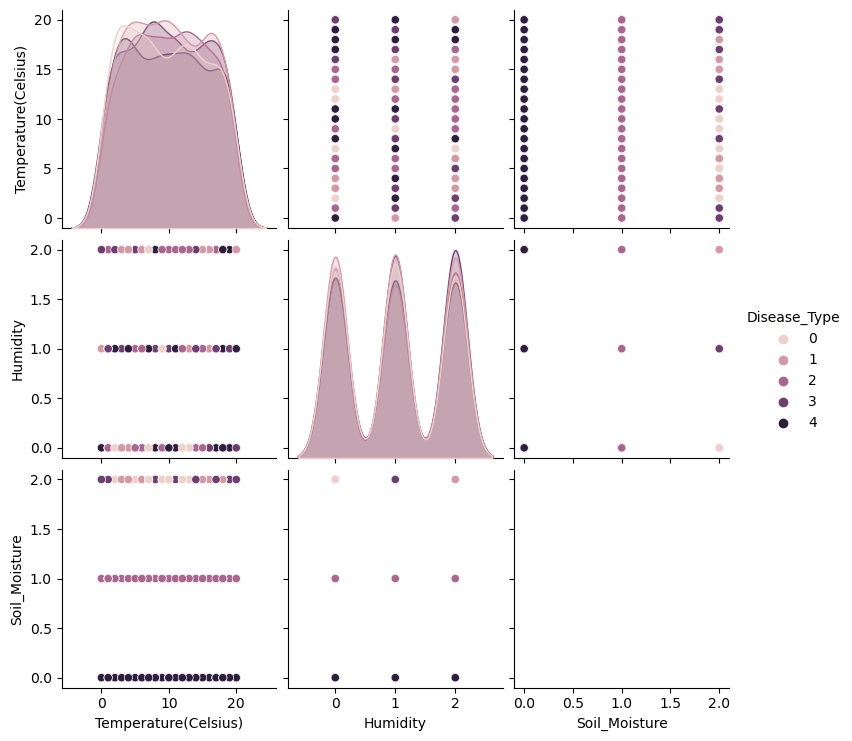

In [19]:
# Pair plot for visualizing relationships between features
sns.pairplot(df[['Temperature(Celsius)', 'Humidity', 'Soil_Moisture', 'Disease_Type']], hue='Disease_Type', diag_kind='kde')
plt.show()

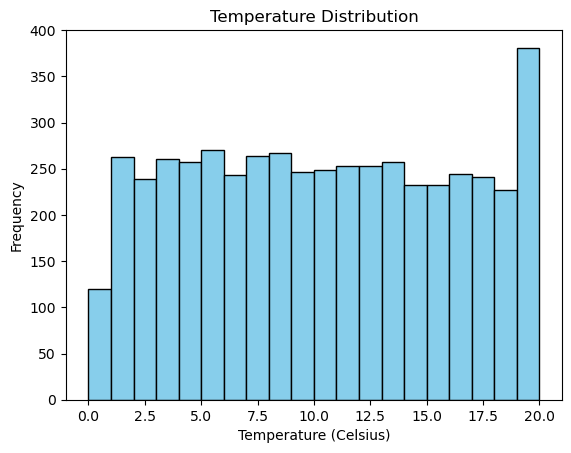

In [20]:
# Histogram for Temperature
plt.hist(df['Temperature(Celsius)'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.show()



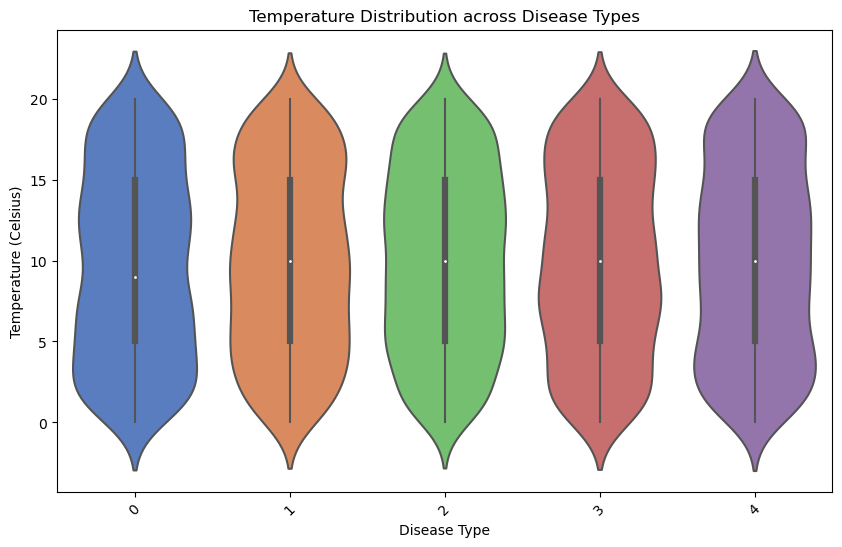

In [21]:
# Violin plot for Temperature across Disease Types
plt.figure(figsize=(10, 6))
sns.violinplot(x='Disease_Type', y='Temperature(Celsius)', data=df, palette='muted')
plt.xlabel('Disease Type')
plt.ylabel('Temperature (Celsius)')
plt.title('Temperature Distribution across Disease Types')
plt.xticks(rotation=45)
plt.show()




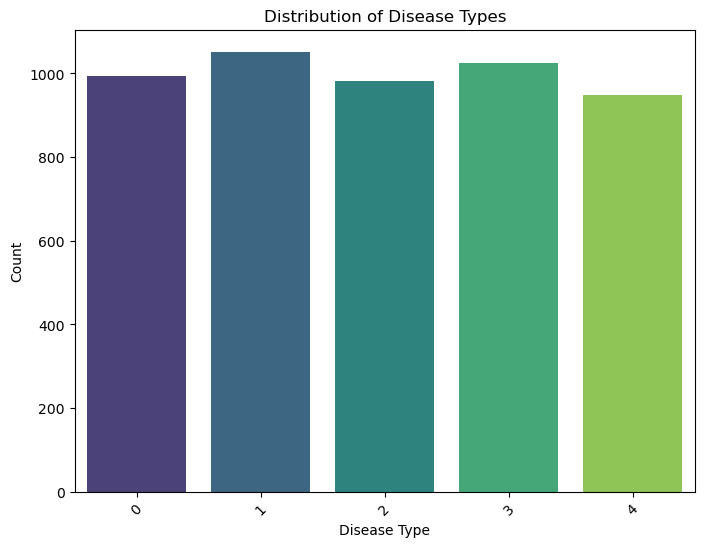

In [22]:
# Bar plot for Disease Type
plt.figure(figsize=(8, 6))
sns.countplot(x='Disease_Type', data=df, palette='viridis')
plt.xlabel('Disease Type')
plt.ylabel('Count')
plt.title('Distribution of Disease Types')
plt.xticks(rotation=45)
plt.show()



<Figure size 1000x800 with 0 Axes>

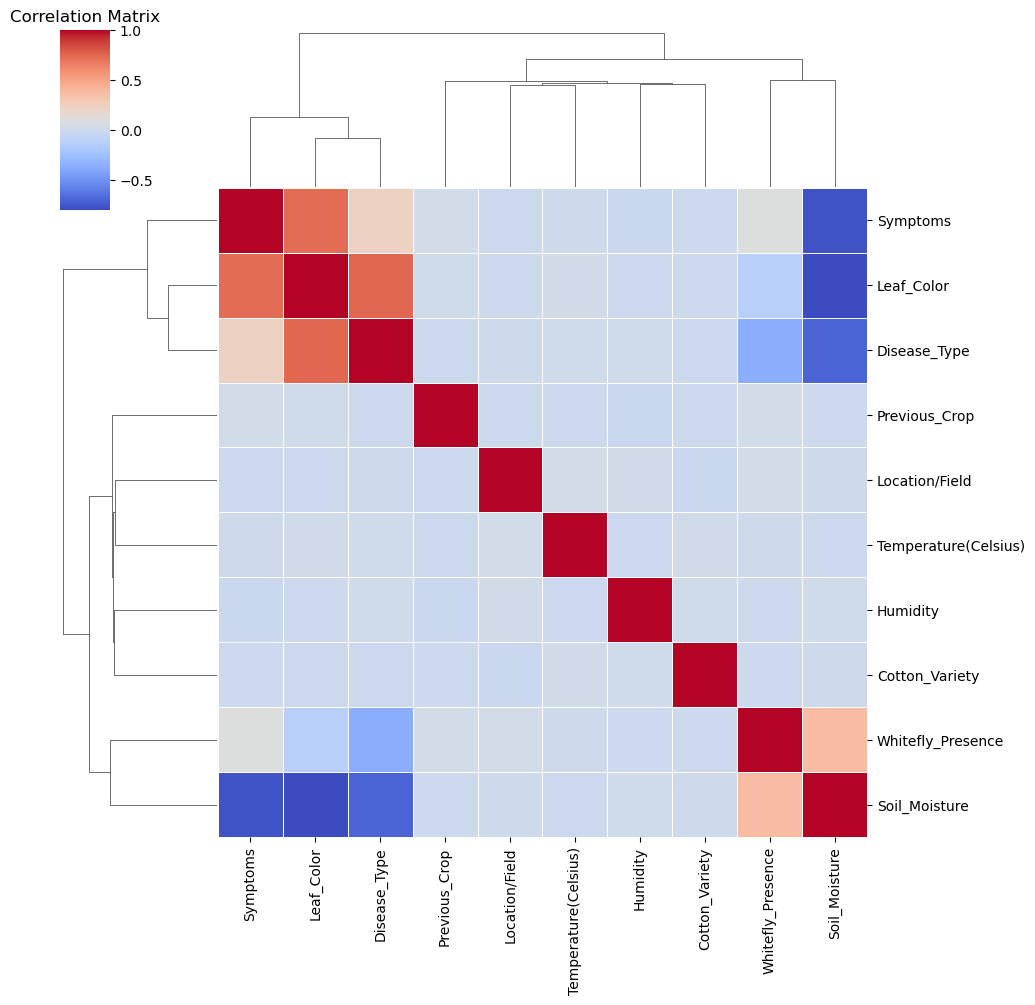

In [23]:
# Cluster map for Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.clustermap(correlation_matrix, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()



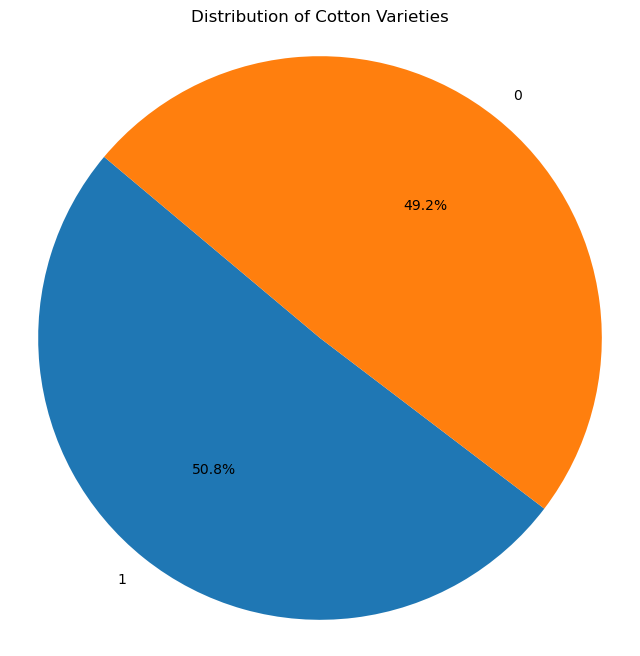

In [24]:
# Pie chart for Cotton Variety distribution
cotton_variety_counts = df['Cotton_Variety'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(cotton_variety_counts, labels=cotton_variety_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Cotton Varieties')
plt.show()



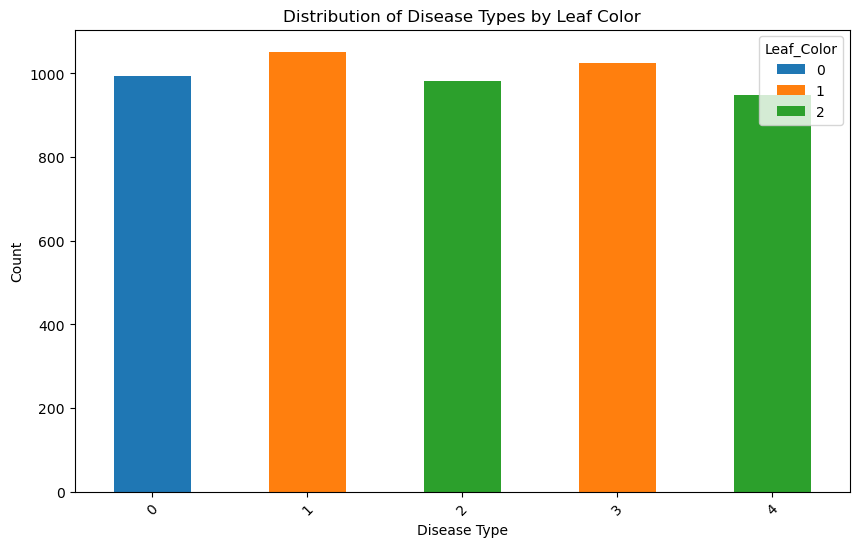

In [25]:
# Stacked bar chart for Disease Types by Leaf Color
disease_leaf_color = pd.crosstab(df['Disease_Type'], df['Leaf_Color'])
disease_leaf_color.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Disease Type')
plt.ylabel('Count')
plt.title('Distribution of Disease Types by Leaf Color')
plt.xticks(rotation=45)
plt.show()



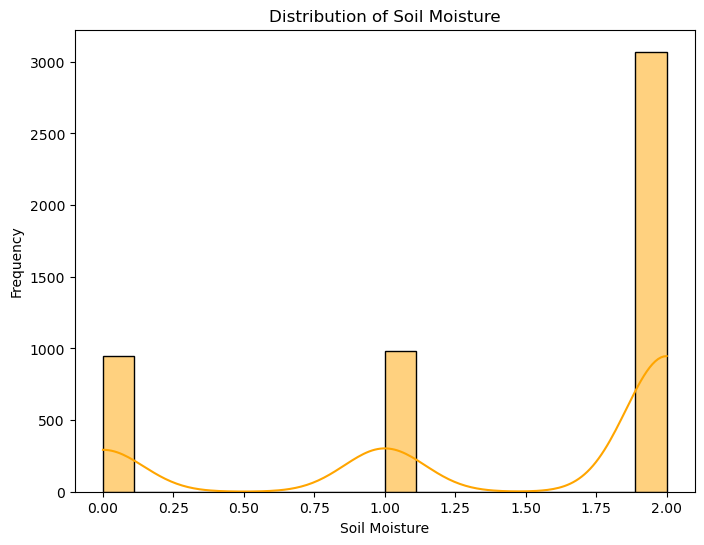

In [26]:
# Histogram with Density Curve for Soil Moisture
plt.figure(figsize=(8, 6))
sns.histplot(df['Soil_Moisture'], kde=True, color='orange')
plt.xlabel('Soil Moisture')
plt.ylabel('Frequency')
plt.title('Distribution of Soil Moisture')
plt.show()



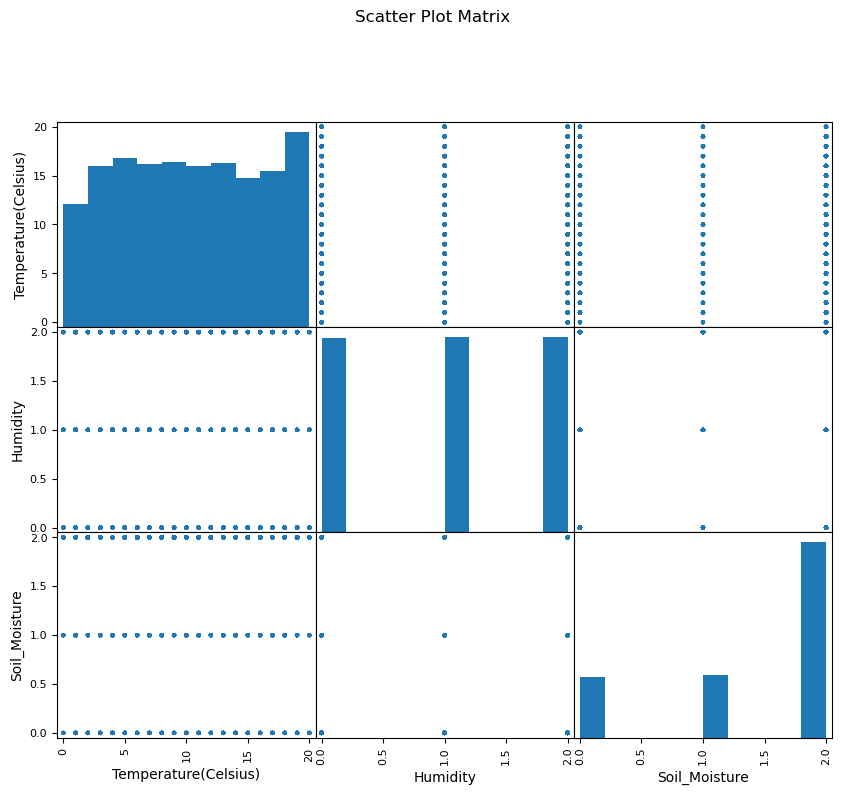

In [27]:
# Scatter Plot Matrix for Temperature, Humidity, and Soil Moisture
from pandas.plotting import scatter_matrix
scatter_matrix(df[['Temperature(Celsius)', 'Humidity', 'Soil_Moisture']], figsize=(10, 8))
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()



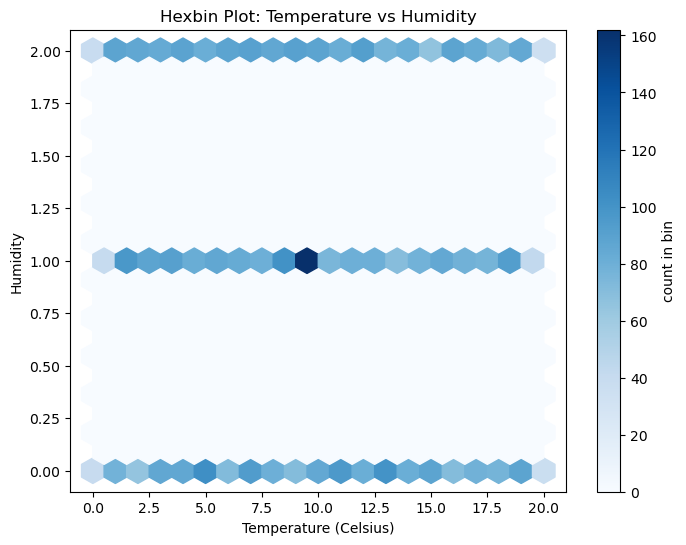

In [28]:
# Hexbin Plot for Temperature and Humidity
plt.figure(figsize=(8, 6))
plt.hexbin(df['Temperature(Celsius)'], df['Humidity'], gridsize=20, cmap='Blues')
plt.colorbar(label='count in bin')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Humidity')
plt.title('Hexbin Plot: Temperature vs Humidity')
plt.show()

In [29]:
X = df[['Location/Field', 'Leaf_Color', 'Symptoms',
        'Cotton_Variety']]
y = df['Disease_Type']


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
regression = LogisticRegression(random_state=42)
regression.fit(X_train_scaled, y_train)
y_pred_r = regression.predict(X_test_scaled)

In [32]:
accuracy_r = accuracy_score(y_test, y_pred_r)
print(f'Accuracy: {accuracy_r}')

print('Classification Report:')
print(classification_report(y_test, y_pred_r))

conf_matrix = confusion_matrix(y_test, y_pred_r)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       187
           1       1.00      1.00      1.00       200
           2       0.51      0.71      0.60       198
           3       1.00      1.00      1.00       216
           4       0.54      0.34      0.41       199

    accuracy                           0.81      1000
   macro avg       0.81      0.81      0.80      1000
weighted avg       0.81      0.81      0.80      1000

Confusion Matrix:
[[187   0   0   0   0]
 [  0 200   0   0   0]
 [  0   0 140   0  58]
 [  0   0   0 216   0]
 [  0   0 132   0  67]]


In [33]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)
y_pred_c = classifier.predict(X_test)

CPU times: total: 1min 57s
Wall time: 3min 56s


In [34]:
accuracy_c = accuracy_score(y_test, y_pred_c)
print(f'Accuracy: {accuracy_c}')

print('Classification Report:')
print(classification_report(y_test, y_pred_c))

conf_matrix = confusion_matrix(y_test, y_pred_c)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       187
           1       1.00      1.00      1.00       200
           2       0.47      0.57      0.52       198
           3       1.00      1.00      1.00       216
           4       0.47      0.37      0.41       199

    accuracy                           0.79      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.79      0.79      0.79      1000

Confusion Matrix:
[[187   0   0   0   0]
 [  0 200   0   0   0]
 [  0   0 113   0  85]
 [  0   0   0 216   0]
 [  0   0 125   0  74]]


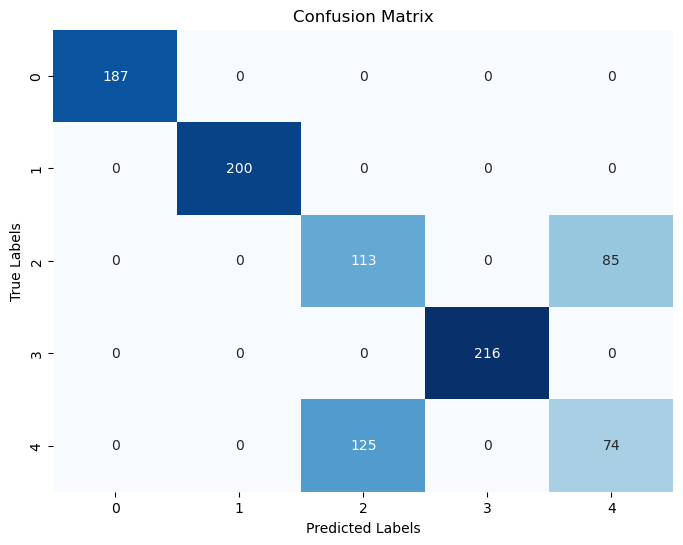

In [36]:
# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [35]:
print("LOGISTIC REGRESSION")
print(accuracy_r)
print("RANDOMFORESTCLASSIFIER ")
print(accuracy_c)

LOGISTIC REGRESSION
0.81
RANDOMFORESTCLASSIFIER 
0.79
